In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df_average = pd.read_csv('mastodon_users_complete.csv')

In [29]:
#drop duplicate username
df_average = df_average.drop_duplicates(subset='username')


In [30]:
#rename statuses_count column to posts_count
df_average.rename(columns = {'statuses_count':'posts_count'}, inplace = True)


In [33]:


df_average = df_average.sort_values(by='username', ascending=True)
df_average.head()

,id,username,acct,bot,followers_count,following_count,posts_count,last_status_at,replies_mean,reblogs_mean,favourites_means
26,111591595219874559,FediTips,FediTips@social.growyourown.services,False,218479,4,1435,2024-05-29,1.075,14.350,2.850
13,1,Gargron,Gargron,False,347453,525,76704,2024-05-30,0.575,2.500,15.650
6,13179,Mastodon,Mastodon,False,816563,3,265,2024-05-06,40.050,549.575,800.950
47,107083792139089762,_kokt,_kokt@simkey.net,False,129824,1650,57341,2024-05-29,0.050,0.050,0.000
39,112168356023442699,aaron.rupar,aaron.rupar@threads.net,False,169219,421,3052,2024-05-30,2.175,10.675,4.975


In [34]:
#remove username Mastodon

df_average = df_average[df_average.username != 'Mastodon']


## Hypothesis Formulation

There is a strong correlation between amount of followers and engagemente activity, which includes posts made, replies, reposts made and favourite selected.b

Lets perform a t-test to see if the significance stands.

### Analysis of the users with the top profile

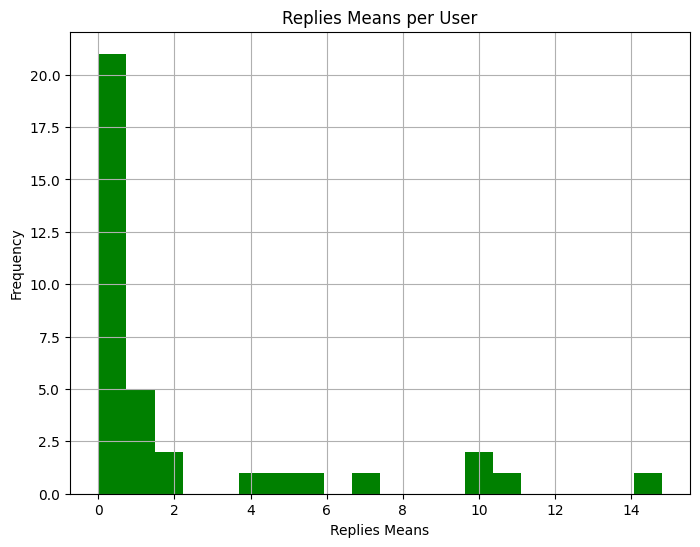

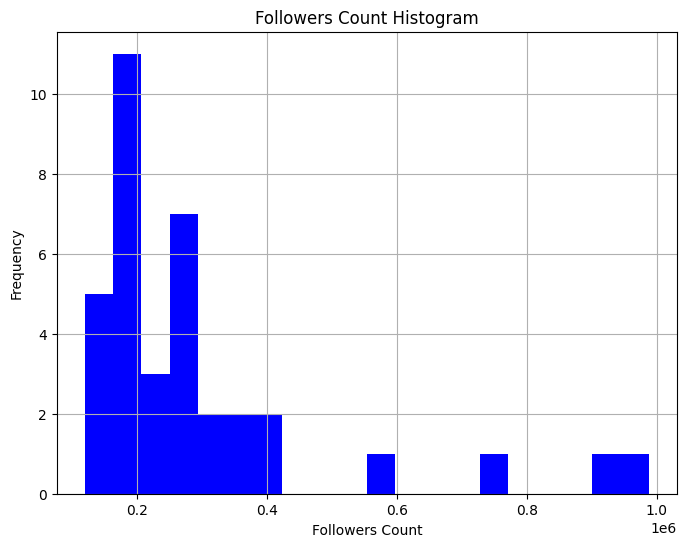

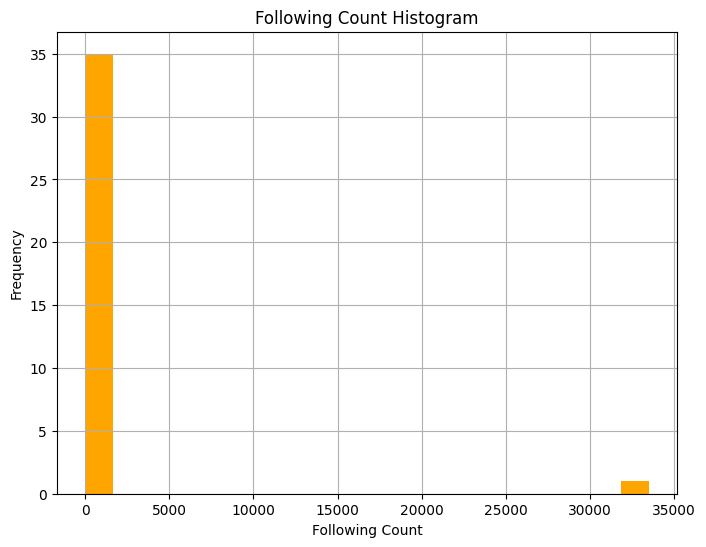

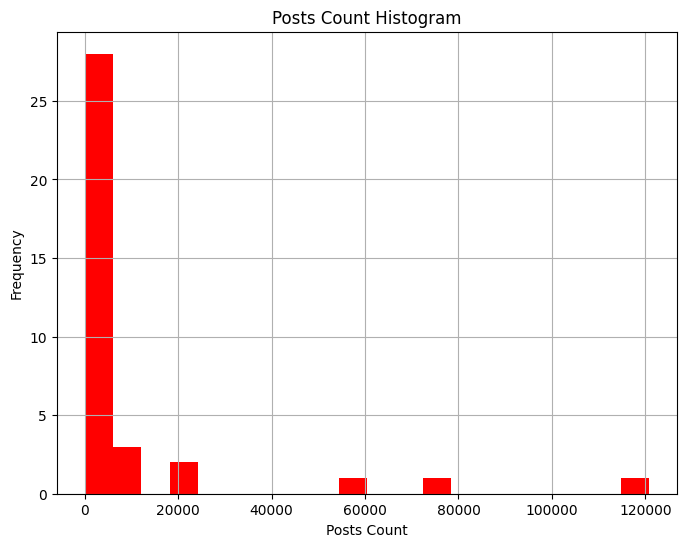

In [43]:

# Show histpolot of replies mean
plt.figure(figsize=(8, 6))
df_average['replies_mean'].hist(bins=20, color='green')
plt.xlabel('Replies Means')
plt.ylabel('Frequency')
plt.title('Replies Means per User')
plt.show()

# Show histpolot of followers count
plt.figure(figsize=(8, 6))
df_average['followers_count'].hist(bins=20, color='blue')
plt.xlabel('Followers Count')
plt.ylabel('Frequency')
plt.title('Followers Count Histogram')
plt.show()

# Show histpolot of following count
plt.figure(figsize=(8, 6))
df_average['following_count'].hist(bins=20, color='orange')
plt.xlabel('Following Count')
plt.ylabel('Frequency')
plt.title('Following Count Histogram')
plt.show()

# Show histpolot of statuses count
plt.figure(figsize=(8, 6))
df_average['posts_count'].hist(bins=20, color='red')
plt.xlabel('Posts Count')
plt.ylabel('Frequency')
plt.title('Posts Count Histogram')
plt.show()

In [9]:
#drop id column

df_average = df_average.drop(columns=['id'])


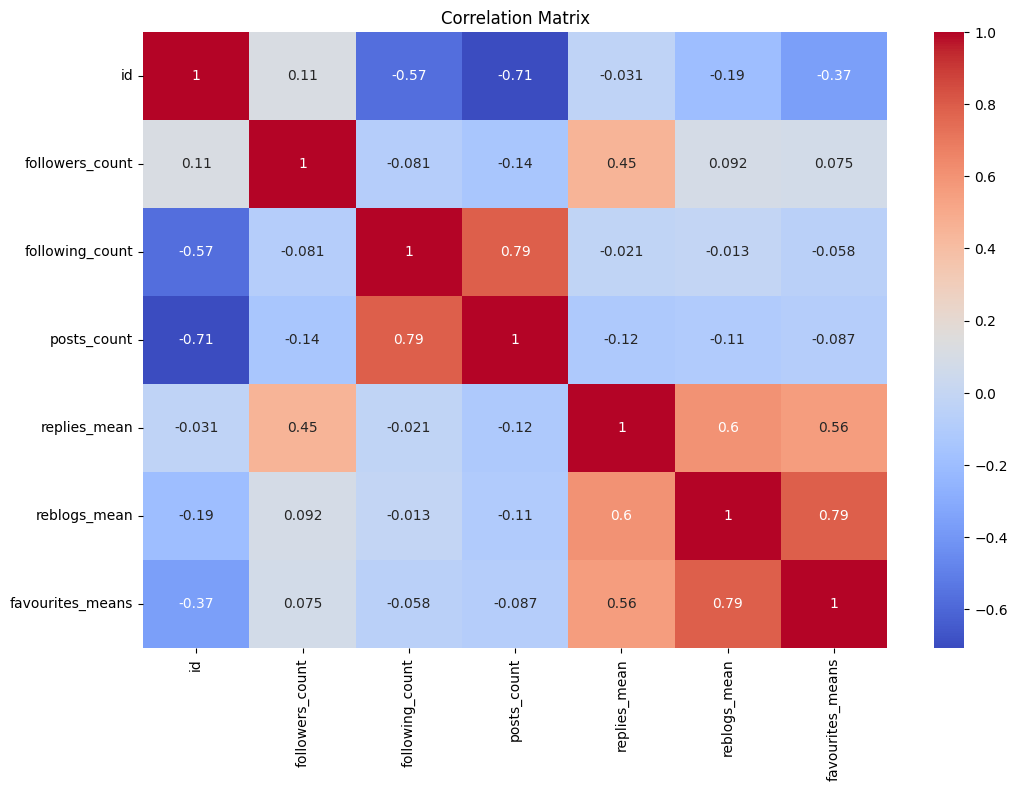

In [36]:
numerical_columns = df_average.select_dtypes(include=['int64', 'float64'])
# Show correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


We see a high correclation of posts made, replies mean with reblogs mean and replies mean with favourites mean. We see same negative correlation of the followers count with posts count, so the more you post the less you post. In general when could have expected a stronger correlation between the numerical value, which was our hypothesis.

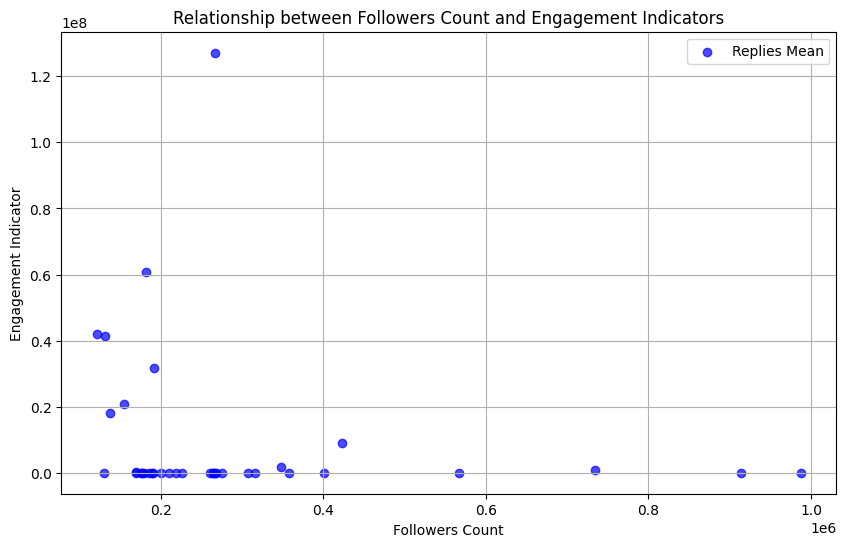

In [37]:
# Scatter plot of engagement indicators (replies mean, reblogs mean, favourites means) with followers count
plt.figure(figsize=(10, 6))
df_average = df_average[df_average['followers_count'] < 1000000]


df_average['coeff'] = df_average['replies_mean'] * df_average['reblogs_mean'] * df_average['favourites_means'] 



plt.scatter(df_average['followers_count'], df_average['coeff'], label='Replies Mean', color='blue', alpha=0.7)

plt.xlabel('Followers Count')
plt.ylabel('Engagement Indicator')
plt.title('Relationship between Followers Count and Engagement Indicators')
plt.legend()
plt.grid(True)

plt.show()

Analysis show that there is no correlation between followers count and engagement. The more followers doesnt lead to higher engagement at all. Interestlingly the followers count up to around 200k there is a significant increase of social media engagement. Which could be because they want to have more followers, whereas after a certain threshold it doesn't matter anymore.

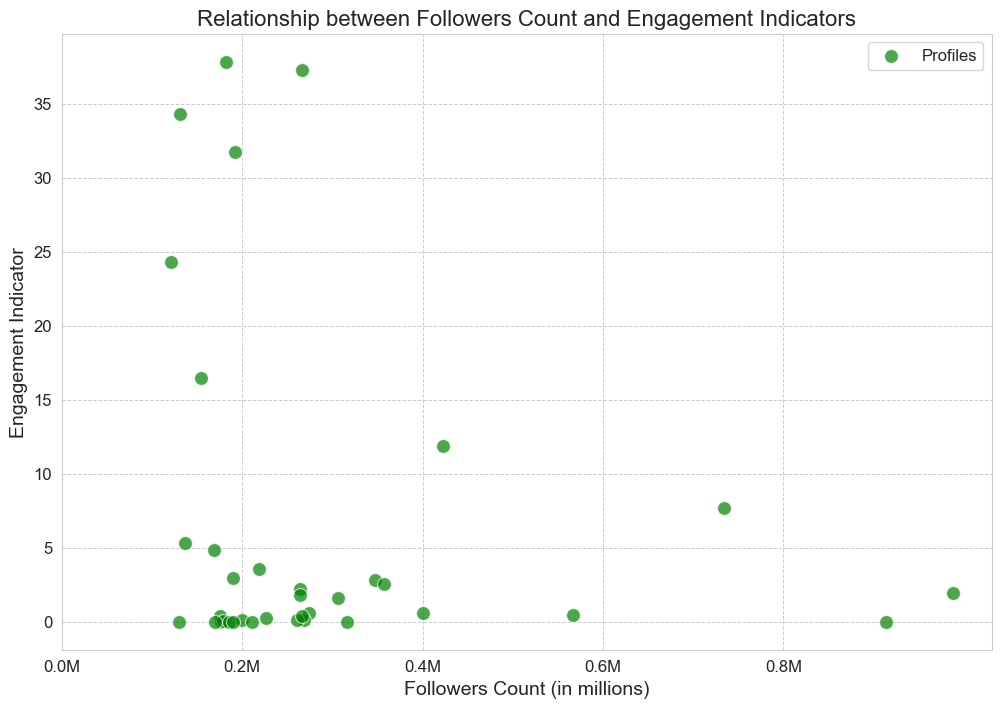

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate geometric mean of engagement indicators
df_average['geometric_mean'] = np.power(df_average['replies_mean'] * df_average['reblogs_mean'] * df_average['favourites_means'], 1/3)

# Filter followers count
df_average = df_average[df_average['followers_count'] < 1000000]

plt.figure(figsize=(12, 8))  # Increase figure size for better visibility

# Create scatter plot
sns.scatterplot(x='followers_count', y='geometric_mean', data=df_average, label='Profiles', color='green', alpha=0.7, s=100, marker='o')

# Set labels and title with increased font size
plt.xlabel('Followers Count (in millions)', fontsize=14)
plt.ylabel('Engagement Indicator', fontsize=14)
plt.title('Relationship between Followers Count and Engagement Indicators', fontsize=16)

# Format x-axis to display followers count in millions
plt.xticks(ticks=np.arange(0, 1000000, step=200000), labels=[f'{x/1e6:.1f}M' for x in np.arange(0, 1000000, step=200000)], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7)  # Clearer grid

plt.savefig('followers_vs_engagement_updated.png', dpi=300, bbox_inches='tight')

plt.show()






other factors that we didnt cover, include in presentation, further directions

x label in millions

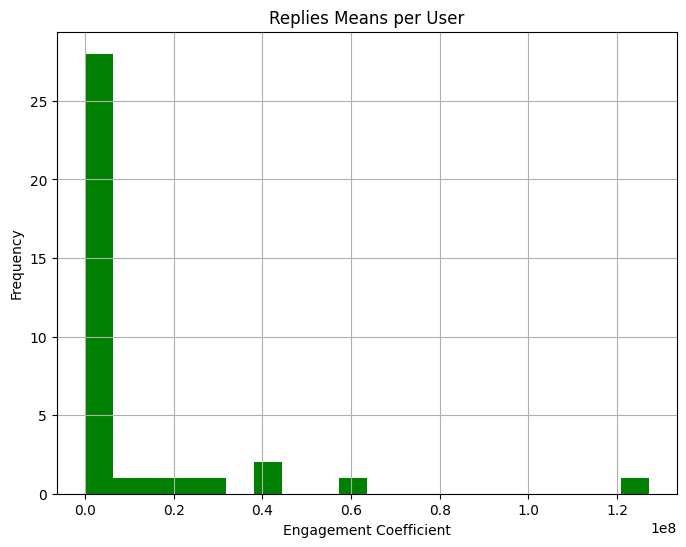

In [45]:
plt.figure(figsize=(8, 6))
df_average['coeff'].hist(bins=20, color='green')
plt.xlabel('Engagement Coefficient')
plt.ylabel('Frequency')
plt.title('Replies Means per User')
plt.show()

In [39]:
#statistical test, we are saying: the more followers you have, the more engagement you get
from scipy.stats import pearsonr

#since it is two continous variables, good to maek a statistical test, range also from -1 to 1 so a correlational test

# Calculate the correlation coefficient
corr, _ = pearsonr(df_average['followers_count'], df_average['coeff'])
print('Pearsons correlation: %.3f' % corr)

# Perform the hypothesis test
alpha = 0.05

if corr > 0:
    print('There is a positive correlation between followers count and engagement indicators')
else:
    print('There is no correlation between followers count and engagement indicators')

if corr > alpha:
    print('Accept null hypothesis')
else:
    print('Reject null hypothesis')

    



Pearsons correlation: -0.177
There is no correlation between followers count and engagement indicators
Reject null hypothesis


In [137]:
import pandas as pd

# Read the CSV file into a DataFrame
df_post = pd.read_csv('Post_data_on_Profiles.csv')


In [217]:


df_post.tags

0        []
1        []
2        []
3        []
4        []
         ..
12496    []
12497    []
12498    []
12499    []
12500    []
Name: tags, Length: 12501, dtype: object

In [108]:

# Convert the datetime strings to datetime objects
#df_post['created_at'] = df_post['created_at'].str[:19]

# Format the datetime objects to only include date, hour, and minute
df_post['created_at'] = pd.to_datetime(df_post['created_at'][:19])

# Display the DataFrame
print(df_post.head())


   Unnamed: 0.1  Unnamed: 0            id                created_at  \
0             0           0  1.122873e+17 2024-04-17 15:31:57+00:00   
1             1           1  1.122535e+17 2024-04-11 16:05:44+00:00   
2             2           2  1.122485e+17 2024-04-10 19:16:12+00:00   
3             3           3  1.122393e+17 2024-04-09 04:01:33+00:00   
4             4           4  1.122357e+17 2024-04-08 12:58:19+00:00   

   in_reply_to_id  in_reply_to_account_id  sensitive spoiler_text visibility  \
0             NaN                     NaN      False          NaN     public   
1             NaN                     NaN      False          NaN     public   
2             NaN                     NaN      False          NaN     public   
3             NaN                     NaN      False          NaN     public   
4             NaN                     NaN      False          NaN     public   

  language  ... reblog                                            account  \
0      NaN  ...

In [ ]:
df_post[["username", "id", "language", "replies_count", "reblogs_count",'favourites_count']]

In [136]:
#save df_post to csv

df_post.to_csv('mastodon_post_updated.csv', index=False)


In [153]:
#load csv files Post_data_on_Profiles_clean.csv

df_post_clean = pd.read_csv('Post_data_on_Profiles_clean.csv')
df_post_clean

,Unnamed: 0,username,id,language,replies_count,reblogs_count,favourites_count,created_at,day,hour
0,0,barackobama,1.122873e+17,NaN,3.0,10.0,6.0,2024-04-17 15:31:57+00:00,Wednesday,15
1,1,barackobama,1.122535e+17,NaN,2.0,35.0,14.0,2024-04-11 16:05:44+00:00,Thursday,16
2,2,barackobama,1.122485e+17,NaN,1.0,22.0,14.0,2024-04-10 19:16:12+00:00,Wednesday,19
3,3,barackobama,1.122393e+17,NaN,2.0,12.0,6.0,2024-04-09 04:01:33+00:00,Tuesday,4
4,4,barackobama,1.122357e+17,NaN,2.0,5.0,5.0,2024-04-08 12:58:19+00:00,Monday,12
...,...,...,...,...,...,...,...,...,...,...
12496,1595,lowqualityfacts,1.124807e+17,en,1.0,19.0,14.0,2024-05-21 19:14:00+00:00,Tuesday,19
12497,1596,lowqualityfacts,1.124801e+17,en,6.0,11.0,7.0,2024-05-21 16:49:00+00:00,Tuesday,16
12498,1597,lowqualityfacts,1.124791e+17,en,6.0,11.0,6.0,2024-05-21 12:40:14+00:00,Tuesday,12
12499,1598,lowqualityfacts,1.124765e+17,en,3.0,13.0,10.0,2024-05-21 01:32:31+00:00,Tuesday,1


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

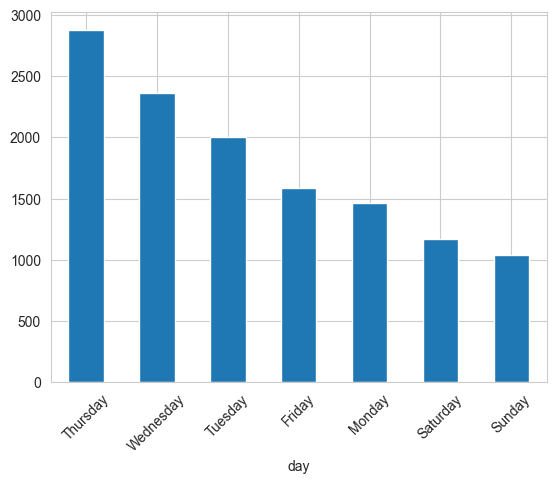

In [155]:
fig = plt.figure()

df_by_day=df_post_clean.groupby("day").count().sort_values("username",ascending=False)

df_by_day["username"].plot(kind="bar")
plt.xticks(rotation=45)

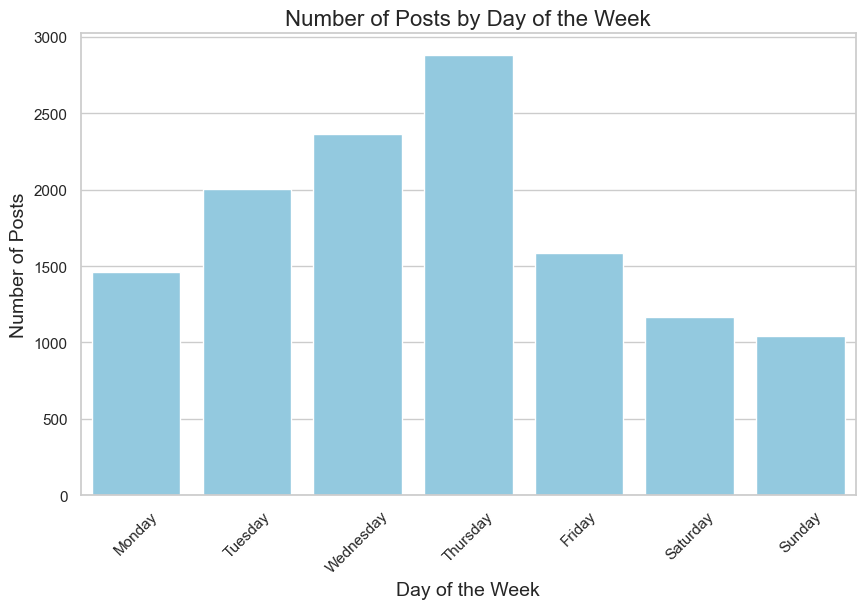

In [158]:

# Group by day and count occurrences
df_by_day = df_post_clean.groupby("day").count()

# Ensure days are ordered from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_by_day = df_by_day.reindex(day_order)

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create the bar plot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_by_day.index, y=df_by_day['username'], color='skyblue')

# Set plot labels and title
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Number of Posts', fontsize=14)
ax.set_title('Number of Posts by Day of the Week', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


#save figure



plt.savefig('posts_by_day.png', dpi=300, bbox_inches='tight')


plt.show()





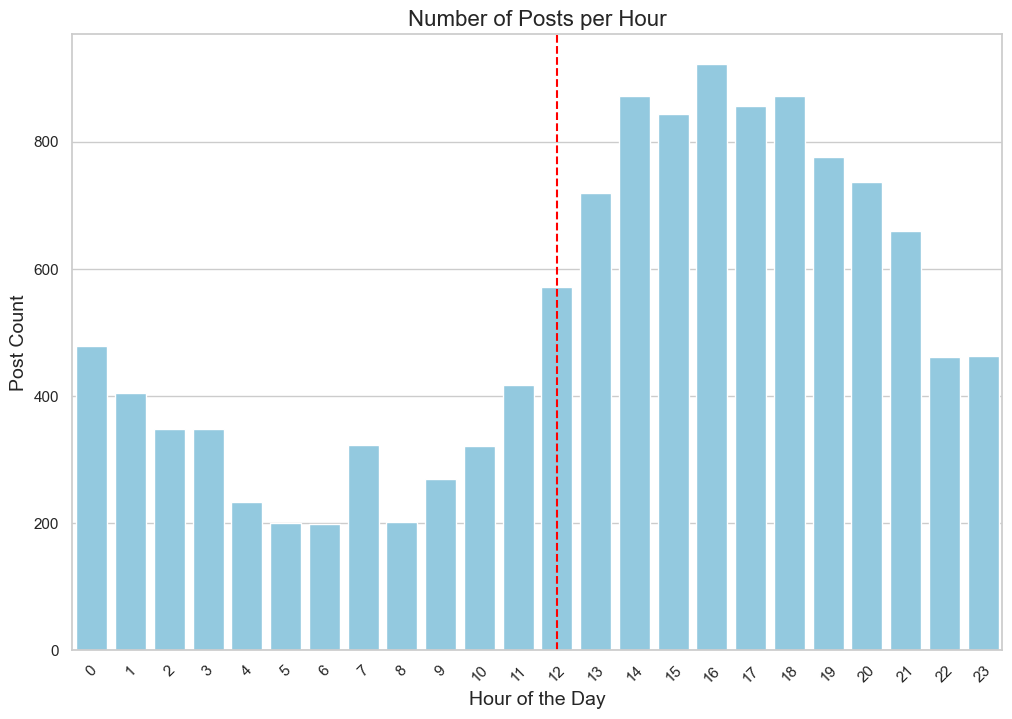

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame for demonstration (Replace with your actual DataFrame)
# df_post_clean = pd.DataFrame({'hour': range(24), 'username': range(24)})

# Group by hour and count occurrences
df_by_hour = df_post_clean.groupby("hour").count()

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create the bar plot
fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df_by_hour.index, y=df_by_hour['username'], color='skyblue')

# Set plot labels and title
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_ylabel('Post Count', fontsize=14)
ax.set_title('Number of Posts per Hour', fontsize=16)

# Add vertical line at 12:00
plt.axvline(12, color="red", linestyle="--")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the figure
plt.savefig('posts_per_hour.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()


In [164]:
df_post_clean['geometric_mean'] = np.power(df_post_clean['replies_count'] * df_post_clean['reblogs_count'] * df_post_clean['favourites_count'], 1/3)

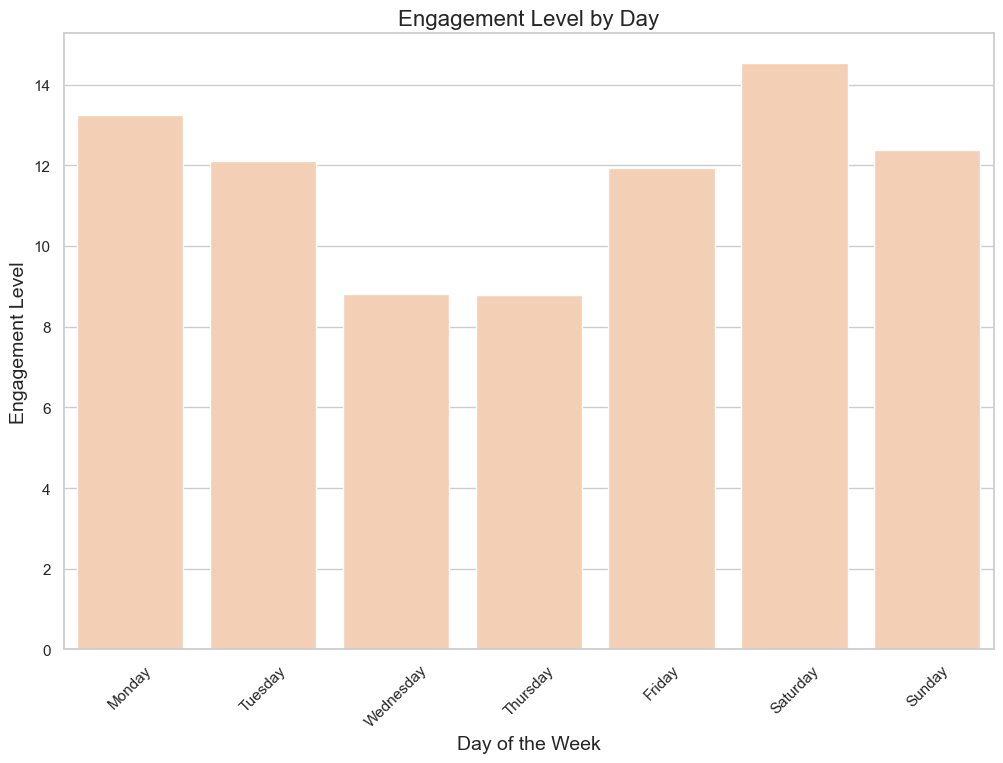

In [199]:
# Ensure days are ordered from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_eng_by_day = df_eng_by_day.reindex(day_order)

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create the bar plot
fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df_eng_by_day.index, y=df_eng_by_day.values, color='#fdcdac')

# Set plot labels and title
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Engagement Level', fontsize=14)
ax.set_title('Engagement Level by Day', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the figure
plt.savefig('engagement_by_day.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

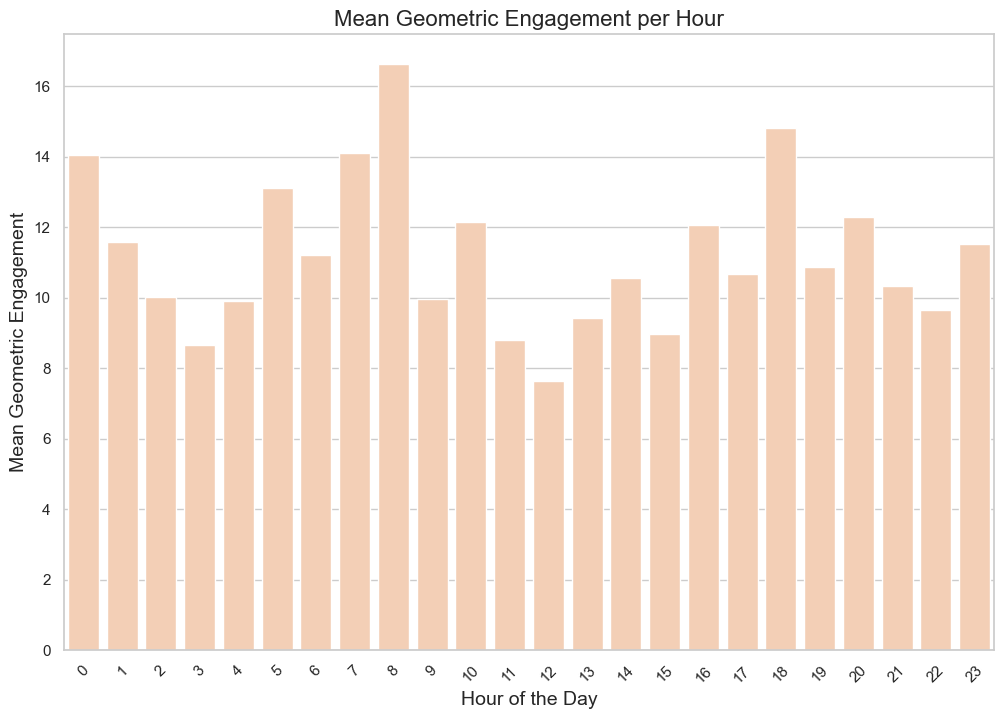

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by hour and calculate mean geometric engagement
df_eng_by_hour = df_post_clean.groupby("hour")["geometric_mean"].mean()

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create the bar plot
fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df_eng_by_hour.index, y=df_eng_by_hour.values, color='#fdcdac')

# Set plot labels and title
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_ylabel('Mean Geometric Engagement', fontsize=14)
ax.set_title('Mean Geometric Engagement per Hour', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the figure
plt.savefig('engagement_by_hour.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


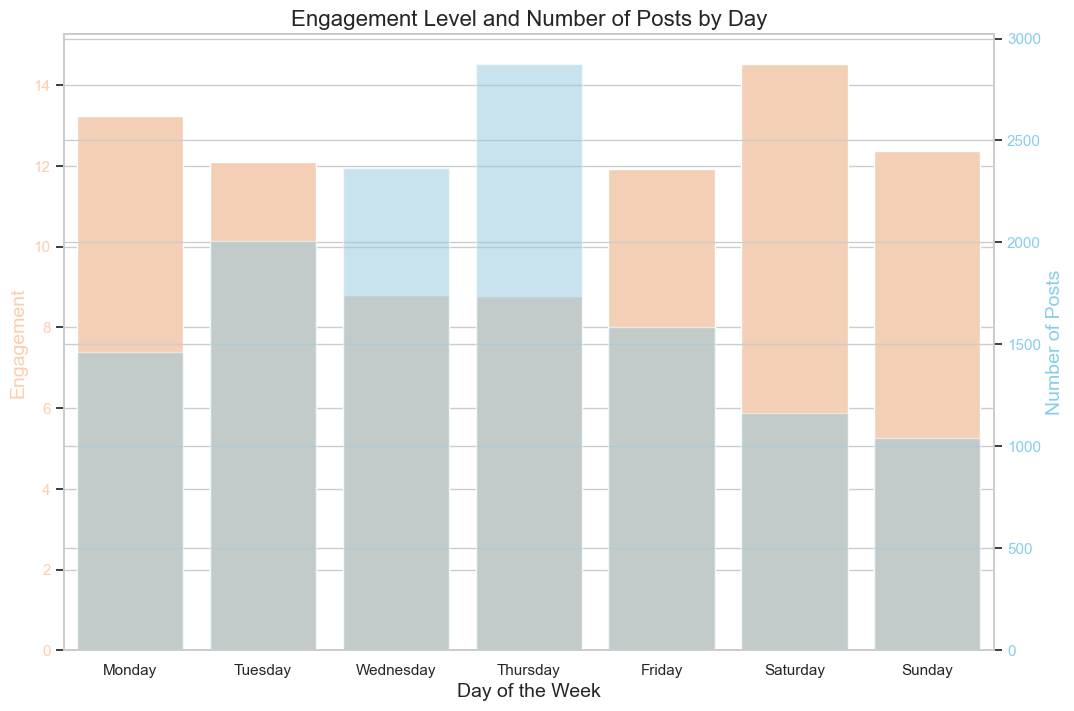

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame for demonstration (Replace with your actual DataFrame)
# df_post_clean = pd.DataFrame({
#     'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']*10,
#     'geometric_mean': np.random.rand(70),
#     'username': np.random.choice(['user1', 'user2', 'user3', 'user4', 'user5'], 70)
# })

# Group by day and calculate mean geometric engagement
df_eng_by_day = df_post_clean.groupby("day")["geometric_mean"].mean()

# Ensure days are ordered from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_eng_by_day = df_eng_by_day.reindex(day_order)

# Group by day and count occurrences
df_by_day = df_post_clean.groupby("day").count()
df_by_day = df_by_day.reindex(day_order)

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the first dataset
sns.barplot(x=df_eng_by_day.index, y=df_eng_by_day.values, color='#fdcdac', ax=ax1)

# Set labels for the first y-axis
ax1.set_xlabel('Day of the Week', fontsize=14)
ax1.set_ylabel('Engagement', fontsize=14, color='#fdcdac')
ax1.tick_params(axis='y', labelcolor='#fdcdac')

# Create a second y-axis to overlay the second dataset
ax2 = ax1.twinx()

# Plot the second dataset
sns.barplot(x=df_by_day.index, y=df_by_day['username'], color='skyblue', alpha=0.5, ax=ax2)

# Set labels for the second y-axis
ax2.set_ylabel('Number of Posts', fontsize=14, color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Set plot title
plt.title('Engagement Level and Number of Posts by Day', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



#save fig

plt.savefig('engagement_vs_posts_by_day.png', dpi=300, bbox_inches='tight')
# Save the figure
#save
# Show the plot
plt.show()

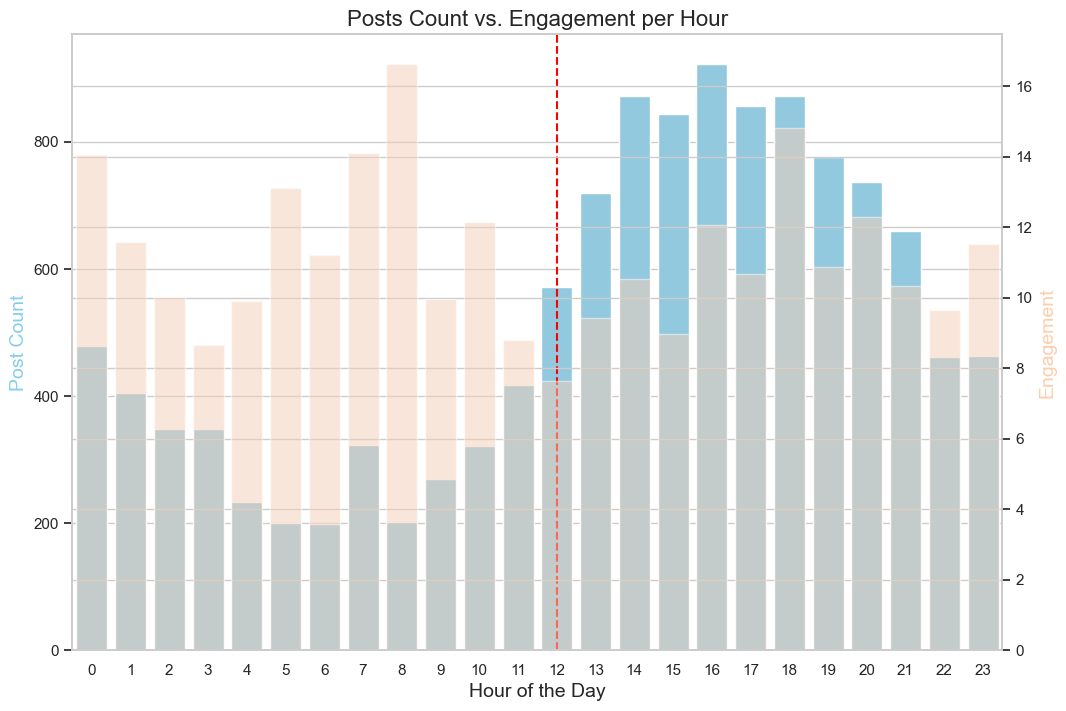

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame for demonstration (Replace with your actual DataFrame)
# df_post_clean = pd.DataFrame({'hour': range(24), 'username': range(24)})

# Group by hour and count occurrences
df_by_hour = df_post_clean.groupby("hour").count()

# Group by hour and calculate mean geometric engagement
df_eng_by_hour = df_post_clean.groupby("hour")["geometric_mean"].mean()

# Apply Seaborn styling
sns.set(style="whitegrid")

# Create the first bar plot for post count
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x=df_by_hour.index, y=df_by_hour['username'], color='skyblue', ax=ax1)

# Set labels for the first y-axis
ax1.set_xlabel('Hour of the Day', fontsize=14)
ax1.set_ylabel('Post Count', fontsize=14, color='skyblue')  # Set label color

# Add vertical line at 12:00 for both plots
ax1.axvline(12, color="red", linestyle="--")

# Create a second y-axis to overlay the second dataset
ax2 = ax1.twinx()

# Plot the second dataset for mean geometric engagement
sns.barplot(x=df_eng_by_hour.index, y=df_eng_by_hour.values, color='#fdcdac', alpha=0.5, ax=ax2)

# Set labels for the second y-axis
ax2.set_ylabel('Engagement', fontsize=14, color='#fdcdac')  # Set label color

# Set plot title
plt.title('Posts Count vs. Engagement per Hour', fontsize=16)

# Save the figure
plt.savefig('posts_and_engagement_per_hour.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



In [213]:
df_post_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12501 entries, 0 to 12500
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        12501 non-null  int64  
 1   username          12501 non-null  object 
 2   id                12501 non-null  float64
 3   language          11104 non-null  object 
 4   replies_count     12501 non-null  float64
 5   reblogs_count     12501 non-null  float64
 6   favourites_count  12501 non-null  float64
 7   created_at        12501 non-null  object 
 8   day               12501 non-null  object 
 9   hour              12501 non-null  int64  
 10  geometric_mean    12501 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.0+ MB
